In [1]:
import os
from google.cloud import bigquery
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/caoshengyuan/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

print('Done!')

Done!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Data Import: Combined_broadband_deployment_rate_and_demographic_info

In [3]:
%%bigquery data
SELECT * 
FROM `broadband-data.CountyInfo.Actual_Norm_broadband_demo_table`

Downloading: 100%|██████████| 3019/3019 [00:01<00:00, 1676.41rows/s]


In [4]:
data.head()

,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,Householder_65_years_and_over_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,housing_density,winter_avg_temp,latitude,longitude
0,0.708170,22019,181.224029,0.254254,0.101485,0.126193,57252.0,0.0,0.0,0.0,0.205003,1.161365,0.476500,0.076,77.143932,55.8,30.229559,-93.358015
1,0.750417,51550,652.021714,0.258860,0.090865,0.104163,80402.0,0.0,0.0,0.0,0.076271,1.272905,0.486258,0.074,244.119718,45.2,36.679376,-76.301788
2,0.461208,55039,141.215784,0.226737,0.090837,0.149804,69280.0,0.0,0.0,0.0,0.351293,1.132644,0.491238,0.083,61.011533,24.6,43.754722,-88.493284
3,0.605571,22075,29.548602,0.274672,0.083977,0.111839,55861.0,0.0,0.0,0.0,0.195382,1.095738,0.487501,0.057,12.305719,58.4,29.282447,-89.576068
4,0.440751,17099,100.355884,0.230136,0.082546,0.163951,62714.0,0.0,0.0,0.0,0.302149,0.623091,0.296241,0.121,44.025722,28.3,41.343341,-88.885931


In [5]:
data.columns

Index(['broadband_rate', 'Countycode', 'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio', 'Householder_65_years_and_over_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio', 'housing_density',
       'winter_avg_temp', 'latitude', 'longitude'],
      dtype='object')

data['Gender ratio difference'] = data['Male_ratio']-data['Female_ratio']

In [7]:
print(len(data))
print(data.Countycode.nunique())


3019
3016


In [8]:
#Normalize 
cols_to_norm = ['broadband_rate',  'Population_density',
       'Age_under_17_ratio', 'Age_between_18_and_24_ratio',
       'Age_above_65_ratio', 'County_median_income', 'House_owner_ratio',
       'One_person_households_ratio', 'Householder_65_years_and_over_ratio',
       'rural_population_ratio', 'Above_high_school_population_ratio',
       'male_ratio', 'unemployment_ratio', 'housing_density',
       'winter_avg_temp', 'latitude', 'longitude']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))


###  State Level

#### 1. Summary

data_state = data.groupby("State_name").mean()
data_state = data_state.sort_values('Broadband_Deployment_rate',ascending=False)
data_state = data_state.reset_index()

data_state.head()

The top five states with highest deployment rate are South Dakota, Rhode Island, Kansas, North Dakota, and Minnesota.

data_state = data.groupby("State_name").mean()
data_state = data_state.sort_values('Broadband_Deployment_rate')
data_state = data_state.reset_index()
data_state2 = data_state.drop(['State_name'],axis=1)
data_state.head()

The top five states with lowest deployment rate are Nevada, New Mexico, Louisiana, Mississippi, and West Virginia

#### 2. Correlation

plt.figure(figsize=(20,20))
sns.heatmap(data_state2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of State Level", fontdict = {'fontsize' : 18})
plt.show()

data_state2.corr().iloc[0].sort_values(ascending=False)[:11]

From corelation table, the 10 most corelated to deloyment rate features are Insurance_equal_1_ratio, Female_ratio, Race_white_ratio, Age_above_65_ratio, Degree_college_ratio, Degree_college_ratio, Rural_density, Population_density, Urban_density, Urban_ratio, and Race_asian_ratio.

fig,ax = plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_state2['Insurance_equal_1_ratio'],data_state2['Broadband_Deployment_rate'])
ax[0,0].set_xlabel("Insurance_equal_1_ratio")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_state2['Female_ratio'],data_state2['Broadband_Deployment_rate'])
ax[0,1].set_xlabel("Female_ratio")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_state2['Race_white_ratio'],data_state2['Broadband_Deployment_rate'])
ax[1,0].set_xlabel("Race_white_ratio")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_state2['Age_above_65_ratio'],data_state2['Broadband_Deployment_rate'])
ax[1,1].set_xlabel("Age_above_65_ratio")
ax[1,1].set_ylabel("Broadband Deployment Rate")

#ax5.scatter(data_state2['Degree_college_ratio'],data_state2['Broadband_Deployment_rate'])
#ax5.set_xlabel("Degree_college_ratio")
#ax5.set_ylabel("Broadband Deployment Rate")

#### 3. Regression

lr = LinearRegression()
X = data_state2.drop(['Broadband_Deployment_rate'],axis=1)
y = data_state2['Broadband_Deployment_rate']
lr.fit(X,y)

coef = pd.DataFrame({"Feature": X.columns, "Coefficients":lr.coef_})
coef = coef.sort_values("Coefficients",ascending=False)
coef

### County Level

#### 1. Summary

In [9]:
data_county = data.sort_values('broadband_rate',ascending=False)
#data_county = data_county.reset_index()

In [10]:
data_county.head()

,broadband_rate,Countycode,Population_density,Age_under_17_ratio,Age_between_18_and_24_ratio,Age_above_65_ratio,County_median_income,House_owner_ratio,One_person_households_ratio,Householder_65_years_and_over_ratio,rural_population_ratio,Above_high_school_population_ratio,male_ratio,unemployment_ratio,housing_density,winter_avg_temp,latitude,longitude
2780,2.227004,38087,-0.161258,-1.038619,-1.104277,0.627178,-0.256987,0.906339,0.483029,0.803711,1.324821,0.642296,0.509745,-2.324256,-0.147634,-1.323332,1.666281,-1.110842
2653,2.227004,38085,-0.159227,4.025195,0.806089,-2.171319,-1.439911,-1.332031,-1.094214,-1.239827,1.324821,0.583045,0.258380,-1.384678,-0.146515,-1.351792,1.597751,-0.894716
2714,2.227004,38043,-0.160494,-0.608162,-0.661123,1.215645,-0.529057,0.619651,0.884780,1.857211,1.324821,0.572775,0.238154,-1.319880,-0.146461,-1.645881,1.766952,-0.774997
2619,2.225770,38005,-0.158592,3.135511,-0.012041,-0.776097,-0.404680,-0.119122,0.081279,0.435620,1.324821,0.507297,0.216954,-1.287481,-0.145281,-1.873562,1.998673,-0.740790
2660,2.225278,38103,-0.159536,-1.631407,-1.220299,3.173195,-0.015752,0.332963,1.286531,1.933368,1.324821,0.457472,0.087529,-1.741070,-0.145510,-1.759721,1.898318,-0.770588


data_county = data.groupby("County_name").mean()
data_county = data_county.sort_values('Broadband_Deployment_rate')
data_county = data_county.reset_index()
data_county.head()

#### 2. Correlation

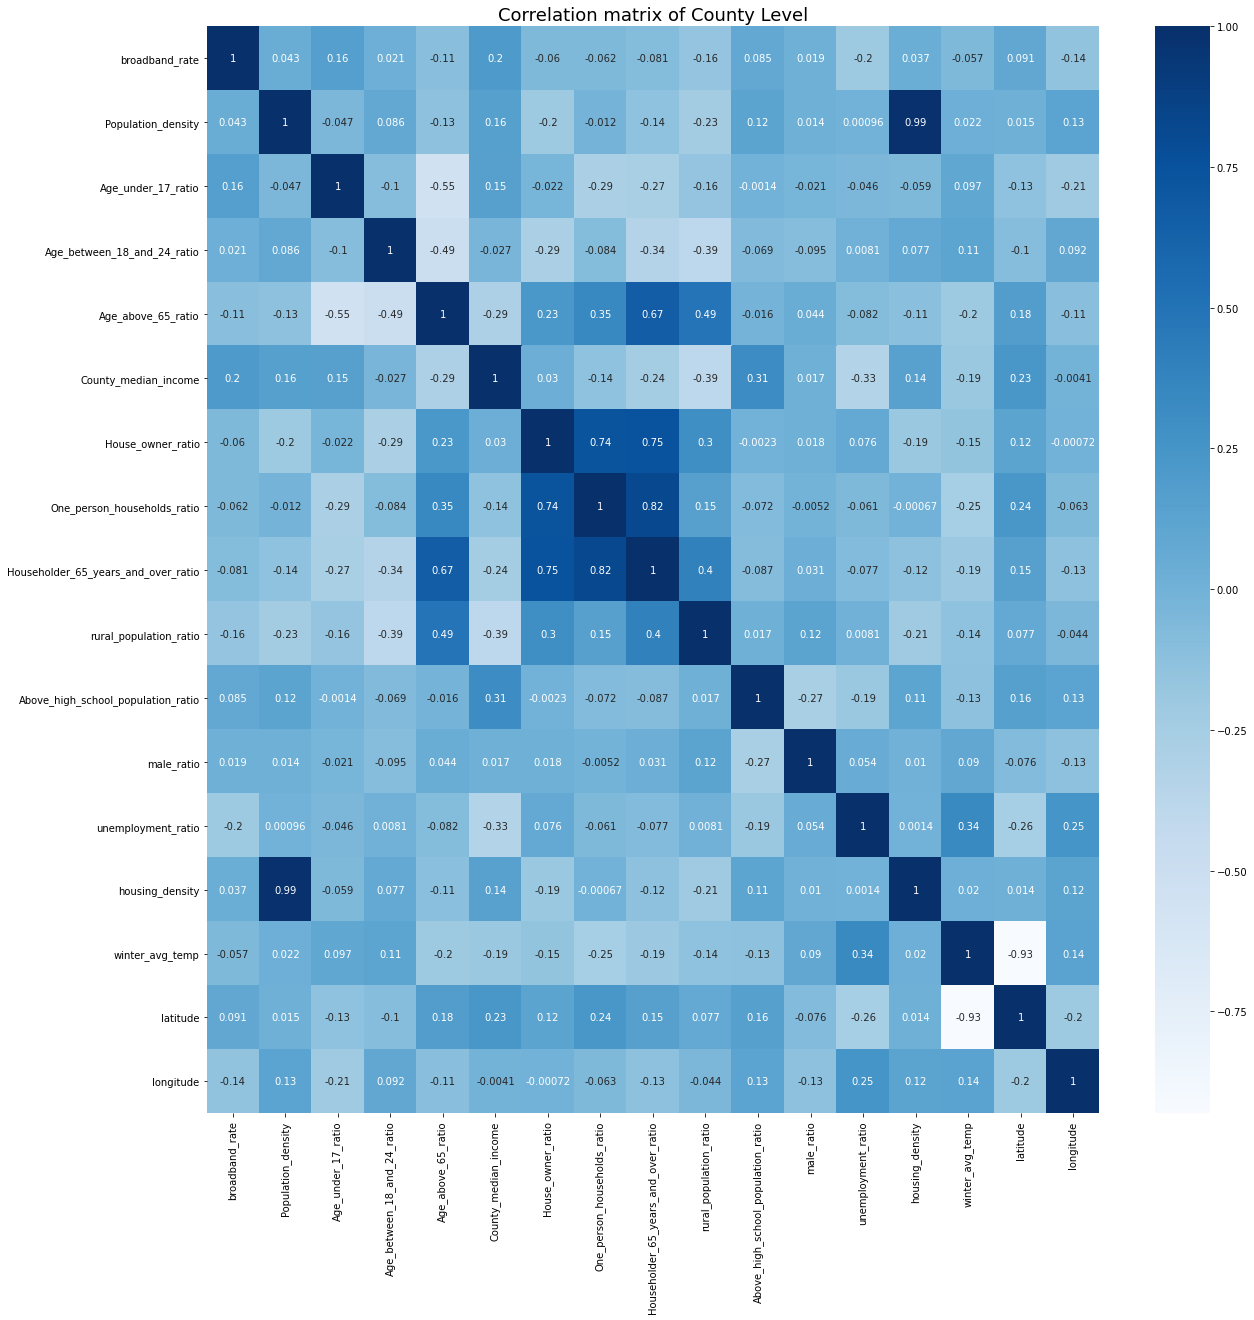

In [11]:
data_county2 = data_county.drop(['Countycode'],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data_county2.corr(),cmap="Blues",annot=True)
plt.title("Correlation matrix of County Level", fontdict = {'fontsize' : 18})
plt.show()

In [13]:
data_county2.corr().iloc[0].sort_values(ascending=False)[:11]

broadband_rate                        1.000000
County_median_income                  0.200715
Age_under_17_ratio                    0.163076
latitude                              0.090727
Above_high_school_population_ratio    0.084951
Population_density                    0.042543
housing_density                       0.036704
Age_between_18_and_24_ratio           0.021006
male_ratio                            0.019081
winter_avg_temp                      -0.057265
House_owner_ratio                    -0.059540
Name: broadband_rate, dtype: float64

Text(0, 0.5, 'Broadband Deployment Rate')

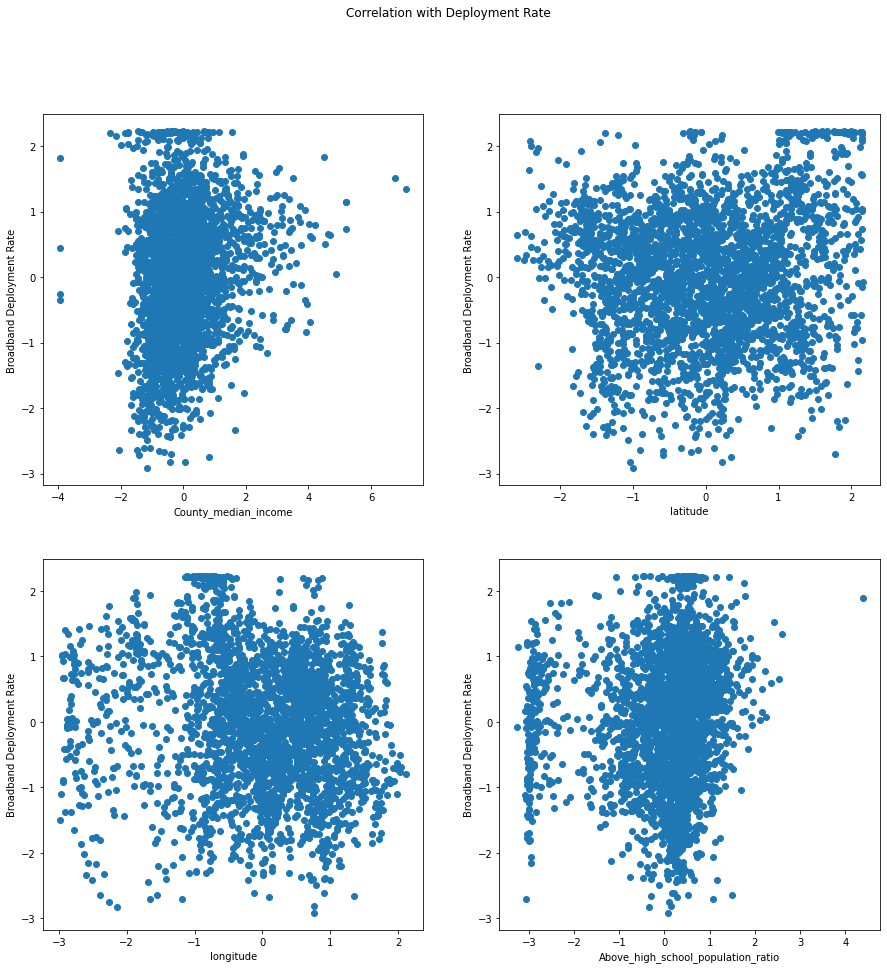

In [14]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
fig.suptitle("Correlation with Deployment Rate")
ax[0,0].scatter(data_county2['County_median_income'],data_county2['broadband_rate'])
ax[0,0].set_xlabel("County_median_income")
ax[0,0].set_ylabel("Broadband Deployment Rate")

ax[0,1].scatter(data_county2['latitude'],data_county2['broadband_rate'])
ax[0,1].set_xlabel("latitude")
ax[0,1].set_ylabel("Broadband Deployment Rate")

ax[1,0].scatter(data_county2['longitude'],data_county2['broadband_rate'])
ax[1,0].set_xlabel("longitude")
ax[1,0].set_ylabel("Broadband Deployment Rate")

ax[1,1].scatter(data_county2['Above_high_school_population_ratio'],data_county2['broadband_rate'])
ax[1,1].set_xlabel("Above_high_school_population_ratio")
ax[1,1].set_ylabel("Broadband Deployment Rate")

#### 4. Regression

In [15]:
lr = LinearRegression()
X = data_county2.drop(['broadband_rate'],axis=1)
y = data_county2['broadband_rate']
lr.fit(X,y)

LinearRegression()

In [18]:
coef = pd.DataFrame({"Feature": X.columns, "Linear regression Coefficients":lr.coef_})
coef = coef.sort_values("Linear regression Coefficients",ascending=False)
coef

,Feature,Linear regression Coefficients
14,latitude,0.304300
13,winter_avg_temp,0.270290
1,Age_under_17_ratio,0.165587
3,Age_above_65_ratio,0.068631
10,male_ratio,0.050994
4,County_median_income,0.045912
9,Above_high_school_population_ratio,0.042864
2,Age_between_18_and_24_ratio,0.037431
5,House_owner_ratio,0.024806
12,housing_density,0.009884
